In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
%config InlineBackend.figure_format = 'retina'



Questions:
    is there a difference in the results in different states? The telephone sector is also the top rank complaint in all the states? is there a difference between non-specialized stores and complaints which sell phones?How long does take for a company to fix the complaint problem?
    

# **Dataset overview Sindec** #

The first line of code returns a warning data type message. We already fixed the problem because it affects our performance, but we kept the steps to handle the warning message.

In [10]:
columns_str=['NumeroCNPJ', 'CNAEPrincipal', 'CodigoProblema', 'CEPConsumidor'] # columns to convert to string
dict_str=dict(zip(columns_str,[str]*4))
date_columns=['AnoCalendario','DataArquivamento','DataAbertura'] #columns to be handle in the dataformat
sindec=pd.read_csv(r"C:\\Users\\tiago\OneDrive\\Área de Trabalho\\CNRF2018.csv",parse_dates=date_columns,dtype=dict_str)

In [11]:
sindec.head()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2018-01-01,2018-06-20 09:45:00,2018-02-19 09:25:00,2,Nordeste,MA,MOTOTEC SERVIÇOS LTDA - ME,MOTOTEC,1.0,8852225000188,...,4752100,COMÉRCIO VAREJISTA ESPECIALIZADO DE EQUIPAMENT...,S,101.0,"Telefone ( Convencional, Celular, Interfone, E...",NaN,NaN,F,entre 41 a 50 anos,65631110
1,2018-01-01,2018-06-20 09:45:00,2018-02-19 09:25:00,2,Nordeste,MA,MAGAZINE LILIANI S/A,LILIANI,1.0,11590296003775,...,4754701,COMÉRCIO VAREJISTA DE MÓVEIS,S,101.0,"Telefone ( Convencional, Celular, Interfone, E...",NaN,NaN,F,entre 41 a 50 anos,65631110
2,2018-01-01,2018-06-20 09:45:00,2018-02-19 09:25:00,2,Nordeste,MA,SAMSUNG ELETRÔNICA DA AMAZONIA LTDA,SAMSUNG,1.0,280273000218,...,2632900,FABRICAÇÃO DE APARELHOS TELEFÔNICOS E DE OUTRO...,S,101.0,"Telefone ( Convencional, Celular, Interfone, E...",NaN,NaN,F,entre 41 a 50 anos,65631110
3,2018-01-01,2018-08-29 08:47:00,2018-05-09 10:58:00,2,Nordeste,MA,TECNO INDUSTRIA E COMERCIO DE COMPUTADORES LTDA,IBYTE,1.0,7272825001690,...,4753900,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,S,76.0,Outros Contratos,NaN,NaN,F,entre 31 a 40 anos,65630020
4,2018-01-01,2018-08-29 08:47:00,2018-05-09 10:58:00,2,Nordeste,MA,SUPERTECH INFORMATICA - JC & CIA LTDA - ME,SUPERTECH INFORMATICA,1.0,9632201000186,...,4751201,NaN,S,76.0,Outros Contratos,NaN,NaN,F,entre 31 a 40 anos,65630020


In [12]:
sindec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39060 entries, 0 to 39059
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AnoCalendario          39060 non-null  datetime64[ns]
 1   DataArquivamento       39046 non-null  datetime64[ns]
 2   DataAbertura           39059 non-null  datetime64[ns]
 3   CodigoRegiao           39060 non-null  int64         
 4   Regiao                 39060 non-null  object        
 5   UF                     39060 non-null  object        
 6   strRazaoSocial         39058 non-null  object        
 7   strNomeFantasia        32242 non-null  object        
 8   Tipo                   39047 non-null  float64       
 9   NumeroCNPJ             37742 non-null  object        
 10  RadicalCNPJ            37622 non-null  float64       
 11  RazaoSocialRFB         34789 non-null  object        
 12  NomeFantasiaRFB        15662 non-null  object        
 13  C

**Fix data type**

From the above, we see that the columns that we have a data type problem with the columns NumeroCNPJ, CNAEPrincipal, CodigoProblema, and CEPConsumidor. Based on the Sindec dictionary, all these columns should be numeric and pandas should interpret as number,but the table above shows they are an object(string or a mix of string and numeric values). 
<br>
The NumeroCNPJ is a column of identification in the Brazilian system it is a unique number of each company. In this analysis, we will set the Null values and alphabet character's values to 0. We are going to use a string because this an identification number.


In [13]:
def convert_to_numeric(x): #function to convert columns type to integer
    patterns='[a-zA-Z]'
    Maske=sindec[x].str.contains(patterns,na=False) #check the non-numeric values
    sindec[x].mask(Maske,other=None,inplace=True) #replace strings that can't be convert to a null value
    sindec[x].fillna(0,inplace=True)
    sindec[x]=sindec[x].astype('str')
    

In [14]:
fix_type=['NumeroCNPJ','CNAEPrincipal','CodigoProblema','CEPConsumidor']
for fix in fix_type:
    convert_to_numeric(fix)
sindec['DescCNAEPrincipal']=sindec['DescCNAEPrincipal'].astype('str')

# **Cleaning Data**#

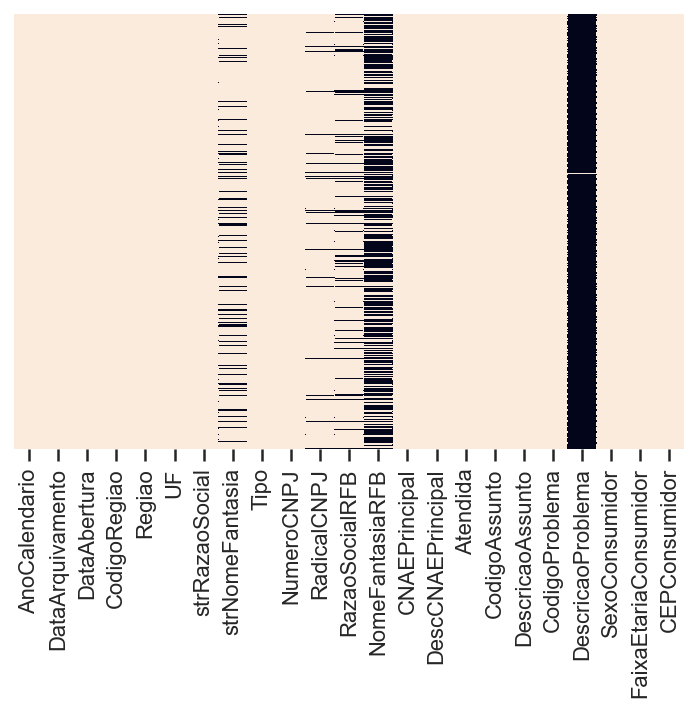

In [15]:
null=sindec.isnull()
sns.heatmap(~null, cbar=False, yticklabels=False)

The graph above shows the columns where we have missing data. The black dashes represent the missing values. We see that column  DescricaProblema is empty, but this column is not necessary for our analysis because it is the user description of the problem and we can rely just on the code problem( CodigoProblema) because it standardizes using the problem code.
Disclaimer: I check the dictionary and there is not a clear specification about the code problem I emailed SINDEC, but because of COVID-19 social distancing they are operating with limited capacity and haven't time to answer me back.

**Fixing anomalies NumeroCNPJ**

NumeroCNPJ is consisted of 14 digits starting with a 0, because of the way the dataset was collected, it is likely that there many values with 13 digits because some software such as Excel removes the values which start with0 .so we are going to find these values and add a zero before.

In [16]:
print('number 13-digit values '+str((sindec[sindec['NumeroCNPJ'].str.len()==13]).shape[0]))
thirteen_digits=[sindec['NumeroCNPJ'].str.len()==13]
def thirteen_digits(x):
    if len(x)==13:
        return '0'+str(x)
    else:
        return x
sindec.NumeroCNPJ=sindec.NumeroCNPJ.map(thirteen_digits)


number 13-digit values 12764


All the NumeroCNPJ values that are less than 13-digits are not useful for our analysis so we are going to set it as Null values.

In [17]:
less_thirteen=sindec['NumeroCNPJ'].str.len()<13
sindec.NumeroCNPJ.mask(less_thirteen,other=None,inplace=True)

**Imputing missing values**

According to the Dictionary, there are 4 names to identify a company
strNomeFantasia(The name consumers know), NomeFantasiaRFB(according to internal Revenue Service), but there is also a number which is the id of each company. There are rows in which we don't have the strNomeFantasiaom but we have the id number to recover these names we are going to look in another column which has the same id number and copy the name. 

In [18]:
CNPJ_NAME=sindec[(sindec['NumeroCNPJ'].notnull()) & (sindec['strNomeFantasia'].notnull())] #select no missing CNPJ and NAME
z=CNPJ_NAME.groupby('NumeroCNPJ')['strNomeFantasia'] 
z.value_counts().sort_values(ascending=False)

NumeroCNPJ      strNomeFantasia                 
04206050000180  TIM CELULAR                         1233
10979023000143  LOJASKD.COM.BR / LOJAS KD           1003
02558157000162  VIVO/TELEFÔNICA                      912
61695227000193  ENEL DISTRIBUIÇÃO SÃO PAULO          862
40432544000147  CLARO / NET / EMBRATEL / CLAROTV     802
                                                    ... 
20233071000141  MOINHO VENTOS                          1
20239629000104  REI DAS BATERIAIS                      1
20240006000143  CONFORTEL HOTELARIA                    1
20247322006773  ALLIED                                 1
01000893000138  WWW.UNIESP.EDU.BR/UNISUZ               1
Name: strNomeFantasia, Length: 7156, dtype: int64

The table above shows that there are different names for the same CNPJ number, looking to the table we see that is because it refers to the different companies' departments. Our approach is to use the most common name to fill the missing values.

In [19]:
CNPJ=CNPJ_NAME.groupby('NumeroCNPJ')['strNomeFantasia'].agg(pd.Series.mode)#most common value for NumeroCNPJ
di=dict(CNPJ)
CNPJ_null=(sindec['strNomeFantasia'].isnull()) #the missing values we want to fix
sindec.loc[CNPJ_null,'strNomeFantasia']=sindec.loc[CNPJ_null,'NumeroCNPJ'].map(di)

In [20]:
sindec['strNomeFantasia'].isnull().value_counts() # reimaning missing values

False    34839
True      4221
Name: strNomeFantasia, dtype: int64

In [21]:
sindec['UF'].isnull().value_counts()

False    39060
Name: UF, dtype: int64

We could not fix all the companies name(strNomeFantasia), but we opted to keep  the missing name rows values because  we  can find out which state it belongs to and also the sector that the company belongs to.

**Translating Key values for our analysis**

Dear reader, feel free to skip this part. The change you need to know is that I created a column complaint_category that is the translation of DescricaoAssunto and sector_activity which is the translation of CNAEPrincipal that describes the activity of the company.

To make the analysis more intuitive for non-Portuguese speakers now we are going to translate the column DescricaoAssunto which represents the sector the company works. For this part, we are using the googletrans library. We are doing a list of unique values because this library is slow and running 39k rows would demand time so instead, we only run for 209 uniques values and apply the dictionary to translate the values.

In [22]:
# def translate(x,y): # x is the value we want to translate and y is the translation
#     port=sindec[x].unique()
#     translate=pd.DataFrame(port,columns=['portuguese'])

#     from googletrans import Translator
#     translator = Translator()
#     translate[y]=translate['portuguese'].apply(translator.translate, src='pt', dest='en').apply(getattr, args=('text',))
#     translate_dict=pd.Series(translate[y].values,index=translate['portuguese'])
#     sindec[y]=sindec[x]
#     sindec[y]=sindec[y].map(translate_dict)

# translate('DescricaoAssunto','complaint_category')
# translate('DescCNAEPrincipal','sector_activity')

# sindec.to_csv(r'C:\\Users\\tiago\\meu procon\\sindec.csv')

Because this library takes too much time to run and it makes our code considerably slower we created another CSV file. and this part of the code will be in the comment format.

In [23]:
date_columns=['AnoCalendario','DataArquivamento','DataAbertura'] #columns to be handle in the dataformat
sindec_clean=pd.read_csv("C:\\Users\\tiago\\meu procon\\sindec.csv",parse_dates=date_columns,index_col=0)
delete=['DescricaoProblema','CodigoProblema','DescricaoAssunto','CodigoProblema','Tipo','NomeFantasiaRFB','DescCNAEPrincipal']

We are going to start making a better translation of terms because the previous was made on Google translator.

In [24]:
sindec_clean['sector_activity']=sindec_clean['sector_activity'].str.replace('MULTIPLE BANKS, WITH COMMERCIAL PORTFOLIO','BANKS').str.replace('FIXED FIXED TELEPHONE SERVICES - STFC','LANDLINE').str.replace('SPECIALIZED RETAILER TRADE FOR HOUSEHOLD APPLIANCES AND AUDIO AND VIDEO EQUIPMENT','AUDIO AND VIDEO').str.replace('RETAIL TRADE IN OTHER PRODUCTS NOT SPECIFIED PREVIOUSLY','RETAIL TRADE')
sindec_clean['complaint_category']=sindec_clean['complaint_category'].str.replace("Telephone \\(Conventional, Cellular, Intercom, Etc.\\)",'Telephone devices').str.replace('Fixed Telephony \\(Expansion Plan / Purchase and Sale / Lease\\)','Landline phone').str.replace('Safe','Insurance')
sindec_clean['FaixaEtariaConsumidor']=sindec_clean['FaixaEtariaConsumidor'].str.replace('entre','').str.replace('anos','').str.replace('mais','more').str.replace('até','until').str.replace('de','than').str.replace('Nao Informada','not disclosed').str.replace('a','-').str.replace('th-n','than')
sindec_clean.rename(columns={'FaixaEtariaConsumidor':'Age'},inplace=True)

**Analysis Brazil overview all the sectors**

To recap:
in this analysis we are interested in the questions Questions:
    <br> Is the survey satisfaction reliable? 
    Do the questions capture the main complaints?
    is there a difference in the results in different states? The telephone sector is also the top rank complaint in all the states? is there a correlation between non-specialized stores and complaints? 

Text(0, 0.5, '')

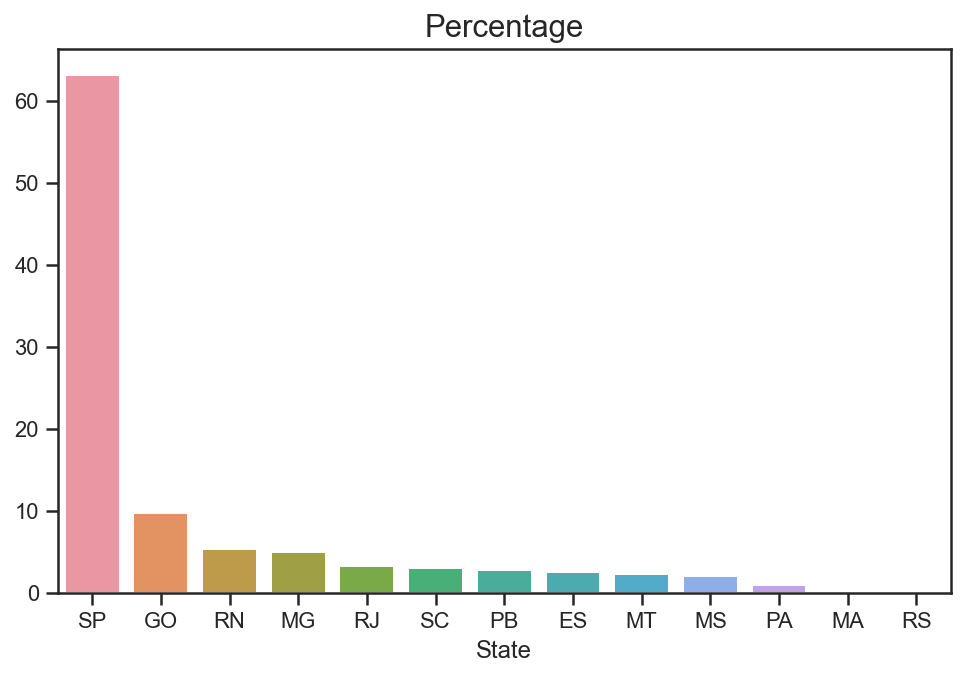

In [25]:
percent_state=sindec_clean['UF'].value_counts(normalize=True)*100 #filtering by states in Brazil.
fig, ax =plt.subplots(1,1,figsize=(8,5))
sns.set(font_scale=1.3)
sns.barplot(x=percent_state.index,y=percent_state).set_title("Percentage")
plt.xlabel("State")
plt.ylabel("")

Text(0.5, 1.0, 'Percentage')

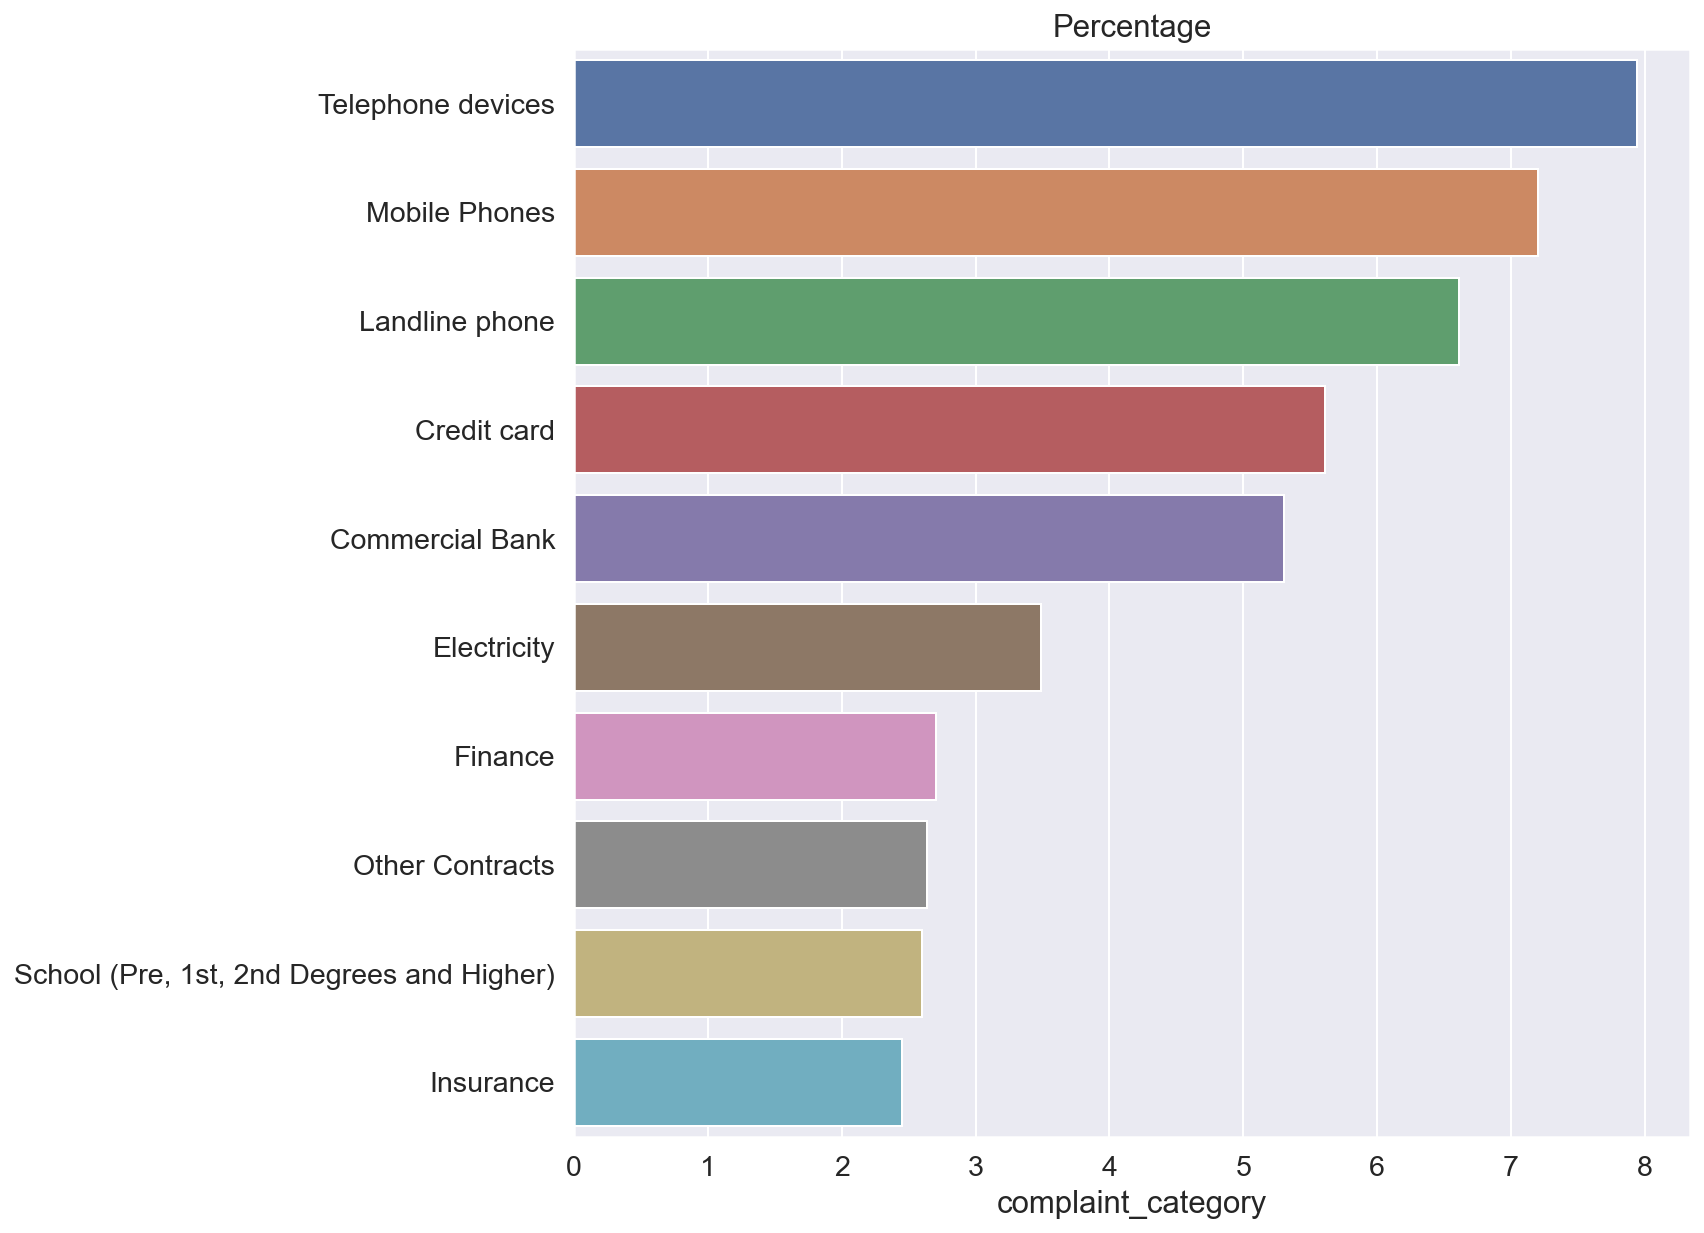

In [26]:
percent_complaint=(sindec_clean['complaint_category'].value_counts(normalize=True)*100).head(10)
fig, ax =plt.subplots(1,1,figsize=(10,10))
sns.set(font_scale=1.3)
sns.barplot(x=percent_complaint,y=percent_complaint.index).set_title("Percentage")

We noticed that São Paulo(SP) is the Brazilian state with most complaints, representing more than 60% of the whole country. However, it does not mean that the quality of services is worse in SP because it has the biggest population in Brazil having more twice the second most populated state in Brazil.

Now we want to have a look at which companies category have more complaints. Sector_activity information comes from the Internal Revenue Service.

Text(0.5, 0, 'Main activity')

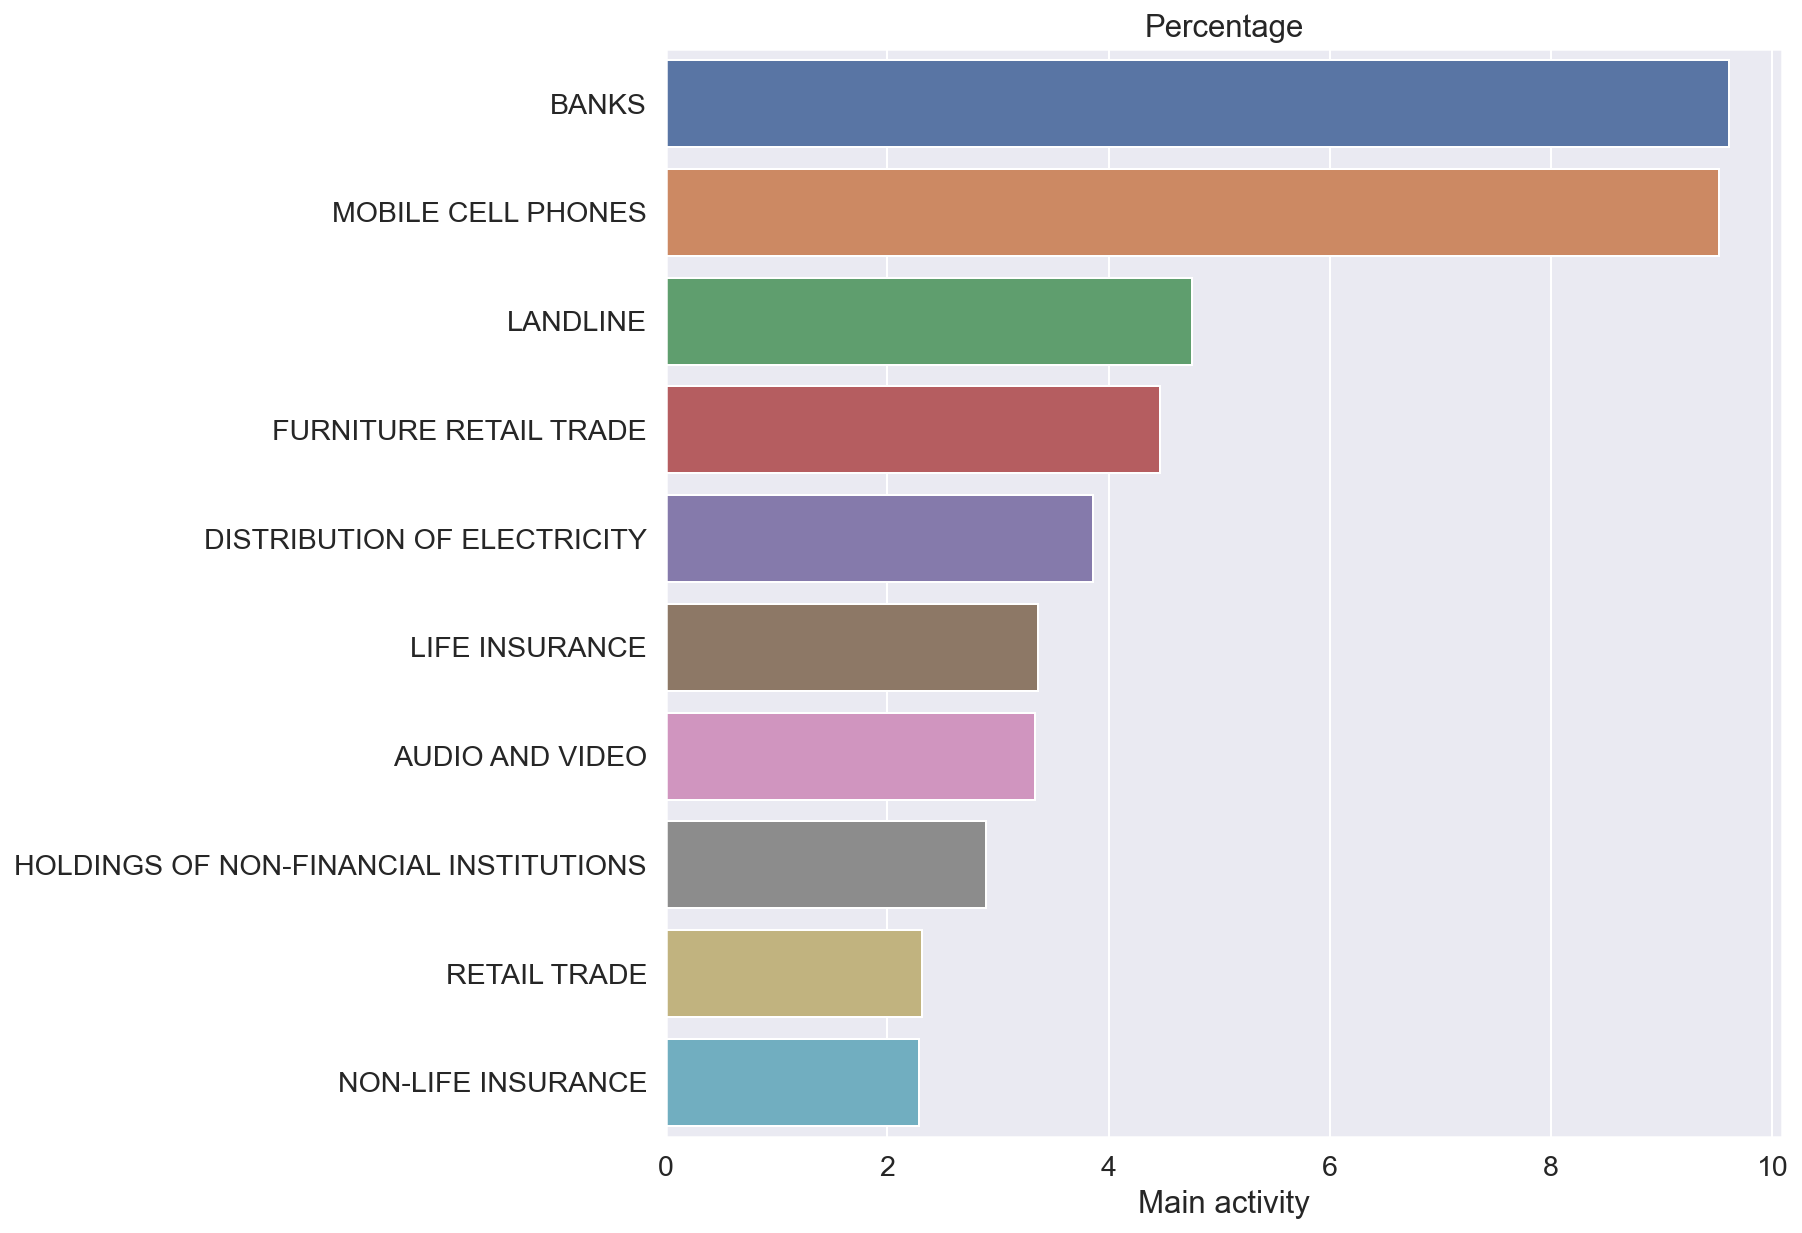

In [27]:
percent_sector=(sindec_clean['sector_activity'].value_counts(normalize=True)*100).head(10)
fig, ax =plt.subplots(1,1,figsize=(10,10))
sns.barplot(x=percent_sector,y=percent_sector.index).set_title("Percentage")
plt.xlabel('Main activity')

We can infer from the difference in sector_activity and complaint_category graphs that many companies do not only work in its main activity, otherwise, Multiples Banks with Commercial Portfolio  would not be the top.

São Paulo is the state with the most complaints in the country, so we are going to have a look in the category of these complaints in the state. For the other states, we are just going to have a look at the main complaint.

Text(0.5, 1.0, 'Percentage SP')

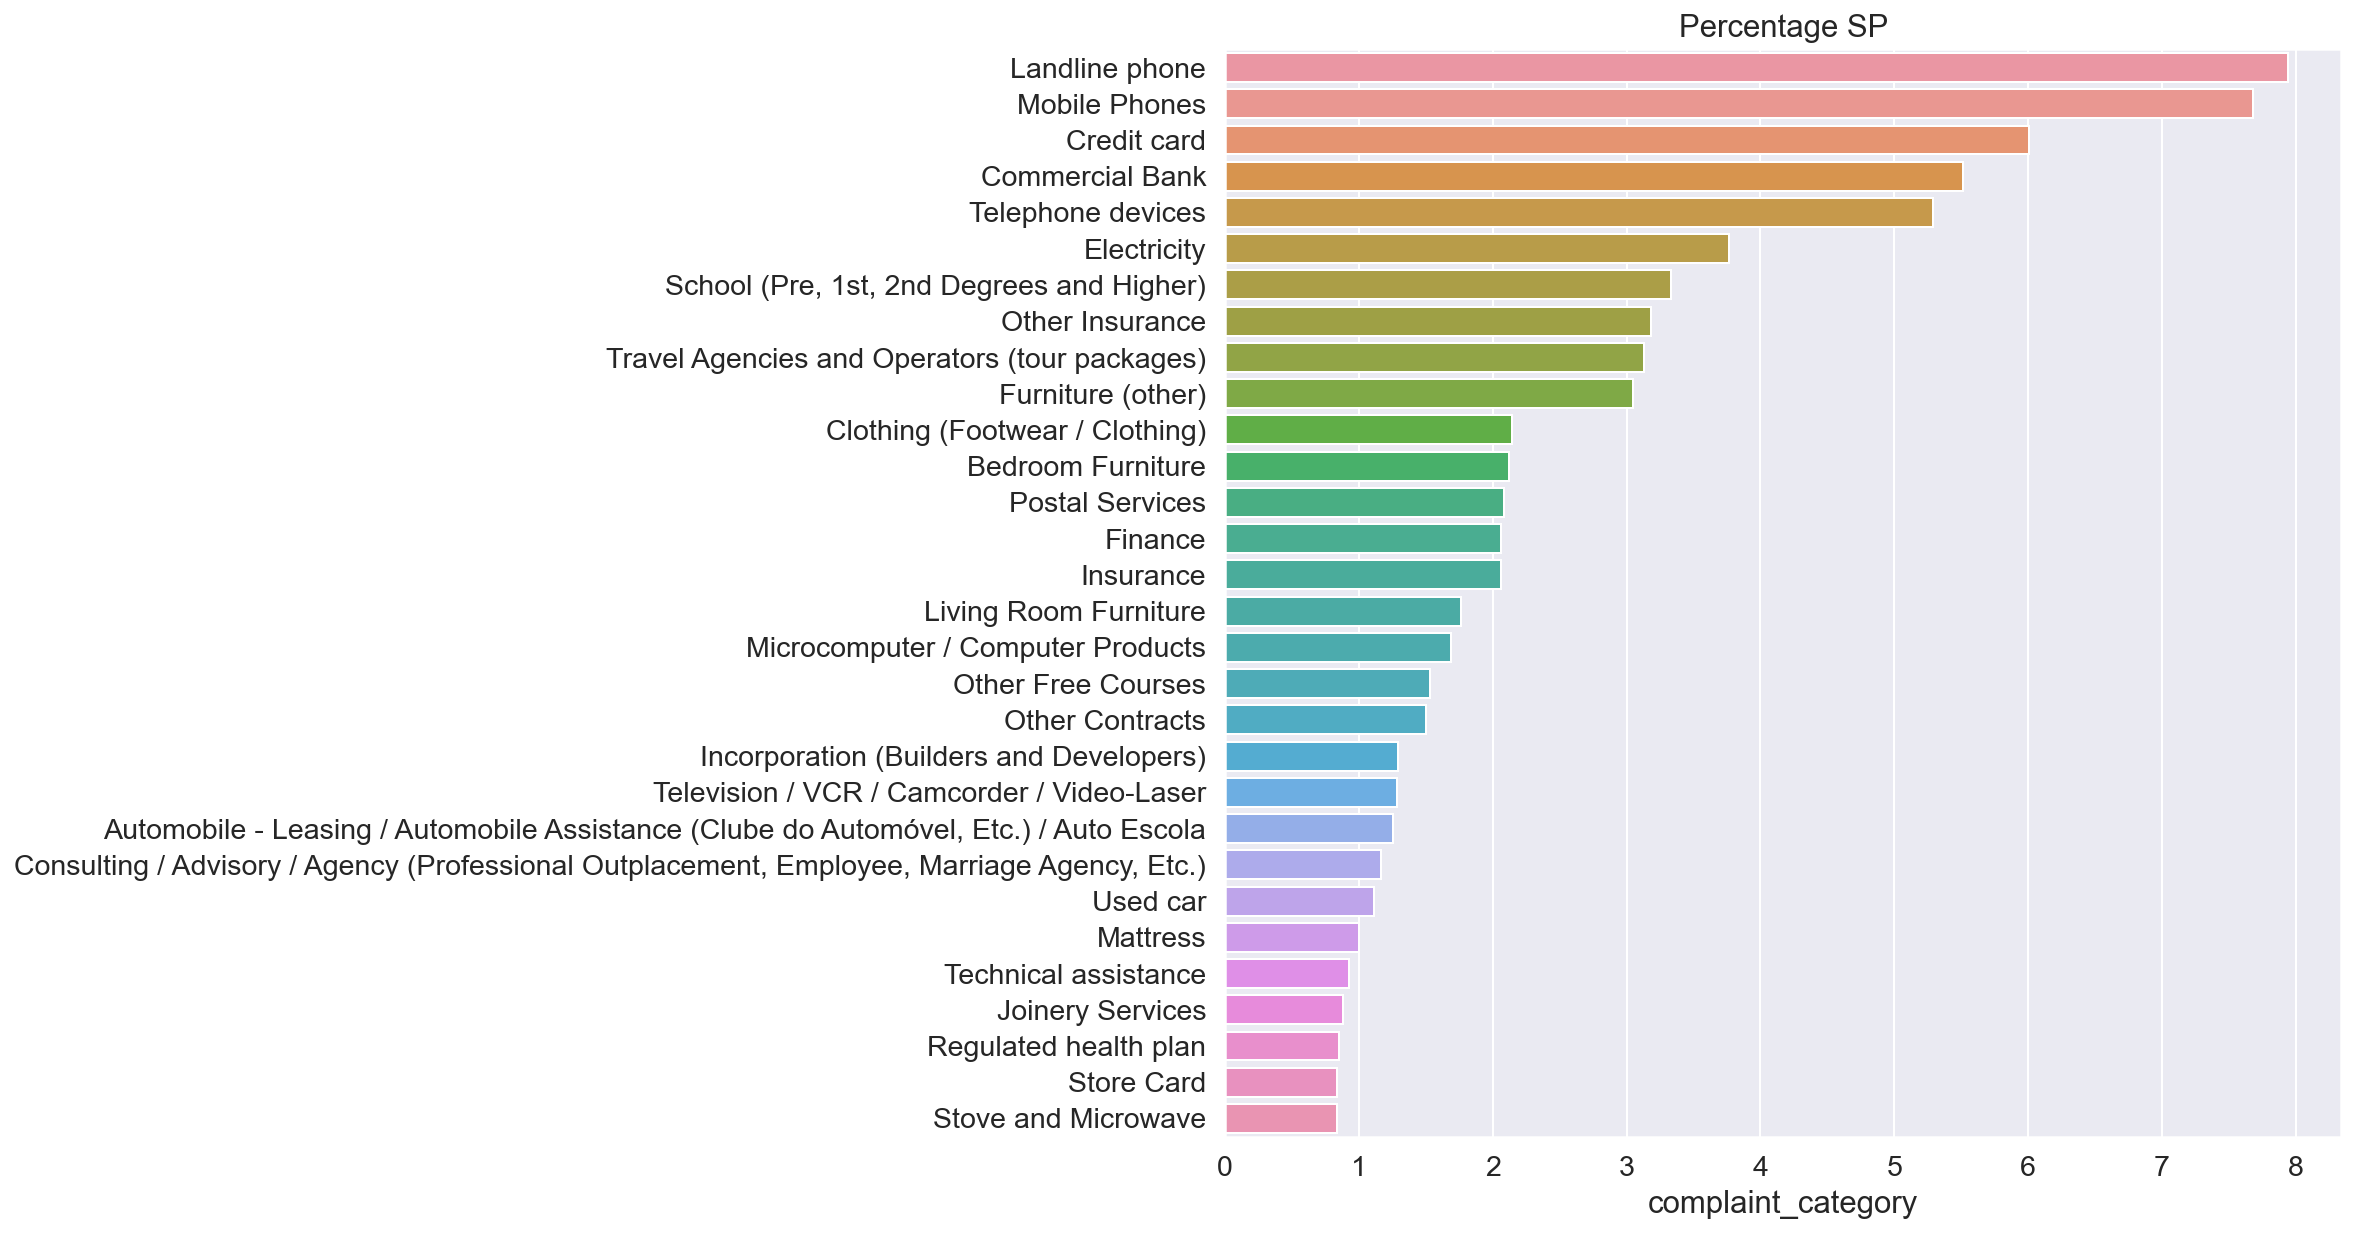

In [28]:
sindec_sp=sindec_clean[sindec_clean['UF']=='SP']
percent_complaint=(sindec_sp['complaint_category'].value_counts(normalize=True)*100).head(30)
fig, ax =plt.subplots(1,1,figsize=(10,10))
sns.set(font_scale=1.3)
sns.barplot(x=percent_complaint,y=percent_complaint.index).set_title("Percentage SP")

In [29]:
sindec_clean.groupby(['UF']).complaint_category.agg([pd.Series.mode])


,mode
UF,
ES,Telephone devices
GO,Telephone devices
MA,Telephone devices
MG,Landline phone
MS,Telephone devices
MT,Telephone devices
PA,Electricity
PB,Telephone devices
RJ,Water / Sewer


The table above shows the main complaint in each state, except Pará(PA), Rio de Janeiro(RJ) and the Rio Grande do Sul(RS), the top complaint is related to the telephone sector.

We had an overview of different complaint activity sector, now we are going to focus only on the telephonic services. To do so we are going to use the regular expression "[Pp]hon" because all the related results have p[p]hon in their orthography.

In [30]:
pattern="[Pp]hon"
telephone_=sindec_clean[sindec_clean['complaint_category'].str.contains(pattern)]
telephone_=telephone_[telephone_['complaint_category']!='Electronic / Battery / Electric Appliance Accessory (Needle, Earphone, Battery, etc.)']


**Telephonic services analysis**

Text(0.5, 1.0, 'Percentage')

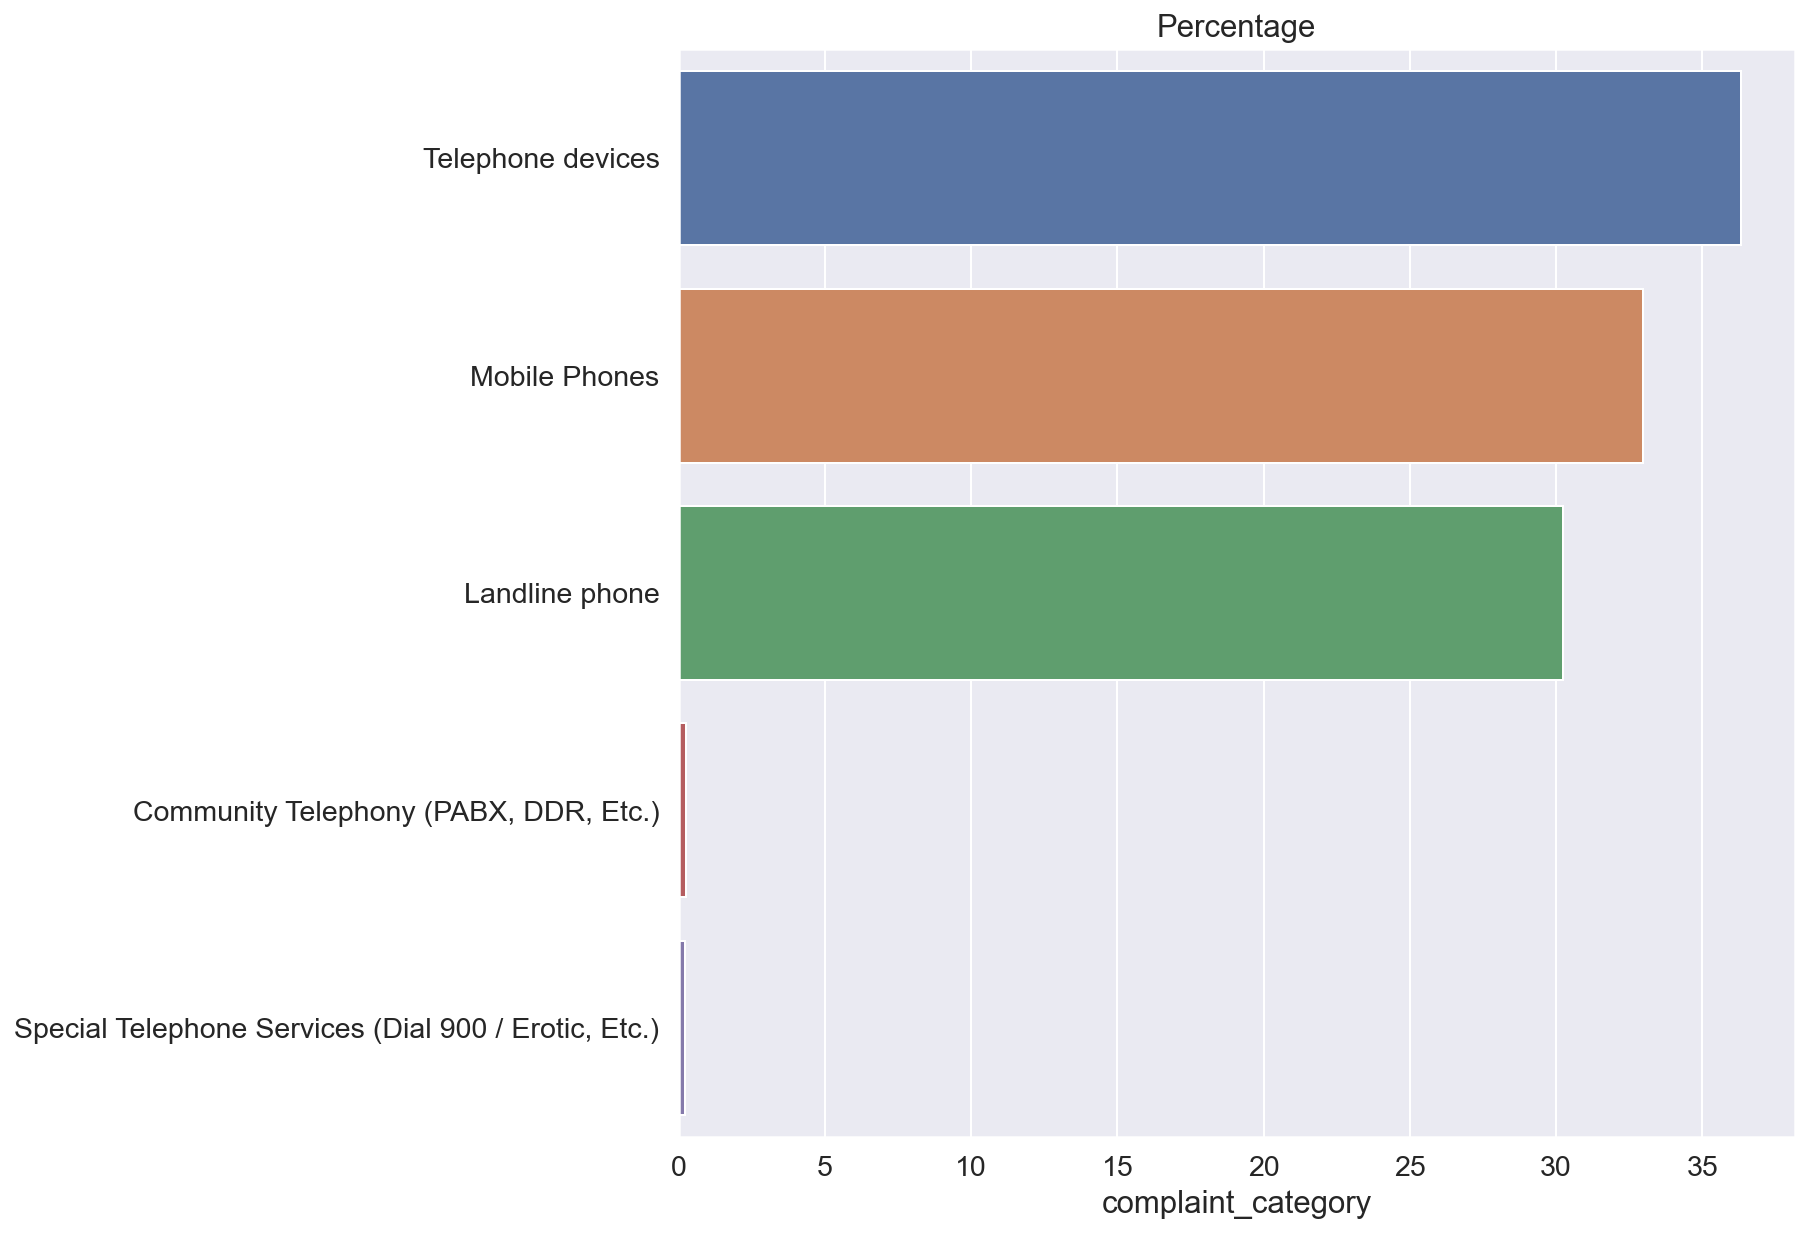

In [31]:
percent_complaint=(telephone_['complaint_category'].value_counts(normalize=True)*100)
fig, ax =plt.subplots(1,1,figsize=(10,10))
sns.set(font_scale=1.3)
sns.barplot(x=percent_complaint,y=percent_complaint.index).set_title("Percentage")

From the graph, we see that the main complaints rely on the services related to landline/internet telephone,and mobile phone operator and phone devices sells and we are going to focus on these three, also we will pay special attention to SP state because it is the one with most complaints.
Now that we already define which sector we are going to analyze, Telephonic one, we are going to make comparisons with the survey made by the National Telecommunications Agency.

In [32]:
telephone=['Telephone devices','Mobile Phones','Landline phone'] 
telephone_=telephone_[telephone_['complaint_category'].isin(telephone)] #select only telephonic companies

telephone_.shape

(8500, 25)

Days to solve a complaint

we are going to investigate how long does take from filling a complaint starting point to resolution point. We opted to take in this analysis only the values that the average deviates less than 20%.

In [33]:
telephone_['days_to_solve']=(telephone_['DataArquivamento']-telephone_['DataAbertura']).dt.days
telephone_solved=telephone_[telephone_['Atendida']=="S"]
std=telephone_solved.groupby(['UF','complaint_category'])['days_to_solve'].describe().loc[:,['mean','std']]
std['CV']=std['std']/std['mean']
std[std['CV']<0.8]

mean         std        CV
UF complaint_category                                   
ES Landline phone        53.000000   32.820217  0.619249
MA Telephone devices    160.200000   47.311732  0.295329
MS Mobile Phones         33.200000    8.361619  0.251856
   Telephone devices     31.909091   19.681094  0.616786
MT Landline phone      1002.666667  663.575668  0.661811
   Telephone devices    420.296774  283.841578  0.675336
PA Landline phone       181.083333  119.628560  0.660627
   Mobile Phones         68.666667   18.583146  0.270628
PB Landline phone        53.772727   42.979432  0.799279
   Mobile Phones         37.128571   18.543268  0.499434
   Telephone devices     75.817308   52.998583  0.699030
RJ Landline phone        34.750000   10.571187  0.304207
   Mobile Phones         30.000000    7.995191  0.266506
   Telephone devices     32.510204   10.803399  0.332308
SP Landline phone        89.235435   27.505177  0.308232
   Mobile Phones         91.457831   27.009200  0.295319
   Telephone devices     81.788774   20.507929  0.250743

**Recommendations**

Brazil

Text(0.5, 1.0, 'Brazil')

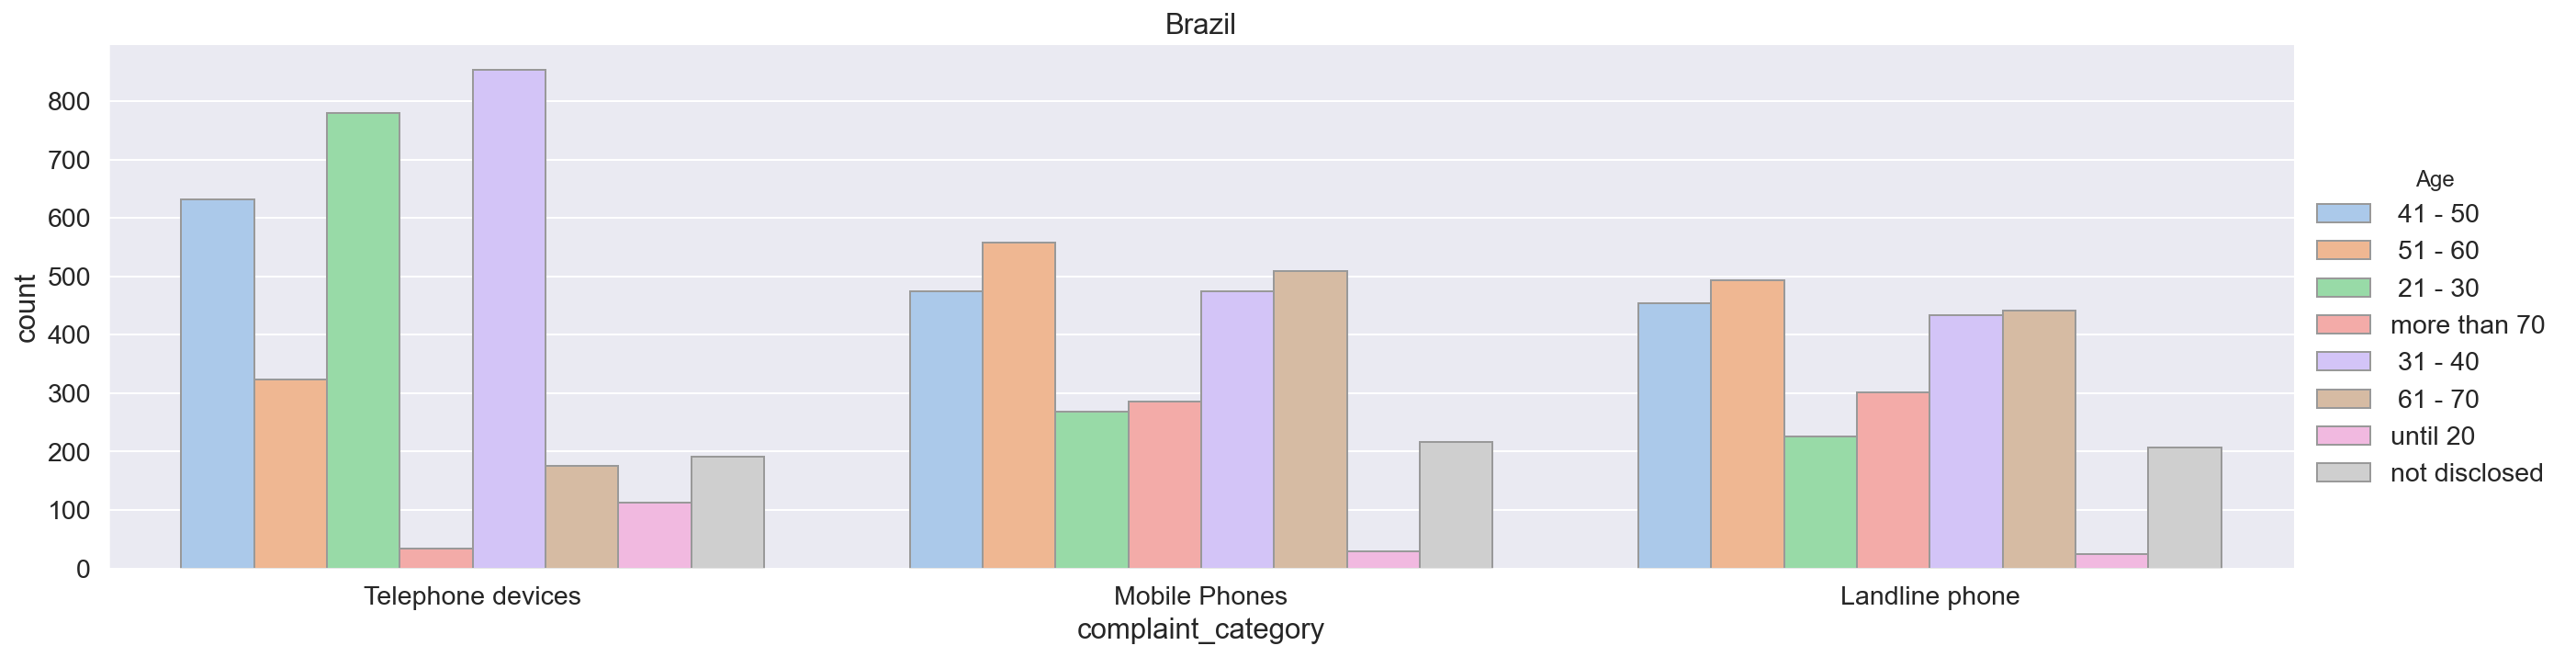

In [34]:
telephone_no_sp=telephone_[telephone_['UF']!='SP']
sns.catplot(x="complaint_category", hue='Age', kind="count",
            palette="pastel", edgecolor=".6",
            data=telephone_,height=5, order=telephone, 
    aspect=3.5)
plt.title("Brazil")

In [35]:
Brazil without SP

SyntaxError: invalid syntax (<ipython-input-35-b8b7019e40bb>, line 1)

In [ ]:
telephone_no_sp=telephone_[telephone_['UF']!='SP']
sns.catplot(x="complaint_category", hue='Age', kind="count",
            palette="pastel", edgecolor=".6",
            data=telephone_no_sp,height=5, order=telephone, 
    aspect=3.5)
plt.title("Brazil-without São Paulo")


The store which sells Telephone devices should focus on improving its relationship with its customers who are in the ranges 41-50, 21-30, and 31-40-year-old in the respective order because they represent most of the complaints. According to the  Brazilian Statistics Institute, these ranges are also the majority of the Brazilian population who are legally entitled to those services.
<br>
The Mobile Phones and Landline operator have similar needs, they both should focus on its relationship with customers who are in the ranges 51-60,31-40, 41-50 in the respective order.

In [ ]:
def state_(x):
    telephone_state=telephone_[telephone_['UF']==x]
    sns.catplot(x="complaint_category", hue='Age', kind="count",
            palette="pastel", edgecolor=".6",
            data=telephone_state,height=5, order=telephone, 
    aspect=3.5)
    plt.title(x)

São Paulo

In [ ]:
state_('SP')

The store which sells Telephone devices should focus on improving its relationship with its customers who are in the ranges 31-40, 21-30, and 41-50-year-old in the respective order because they represent most of the complaints.
<br>
The Mobile Phones and Landline operator have similar needs, they both should focus on its relationship with customers who are in the ranges 51-60, 61-70,31-40 in the respective order.

Comparing both graphs Brazil without SP and SP we noticed that the complaints about Mobile Phones and Landline phones are a special problem for the State of São Paulo. For the other states, we are just going to analyze Telephone devices.

Other states

In [ ]:
telephone_devices=telephone_[telephone_['complaint_category']=='Telephone devices']
sns.catplot(x="complaint_category", hue="Age",kind="count",
                col="UF", data=telephone_devices,col_wrap=3,palette="pastel", edgecolor=".6")

Among the states with a high concentration of complaints per age, interval there are RN and GO, these states should focus on 41-50,21-30 and 31-40.